In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from io import StringIO
import graphviz

%matplotlib inline

sns.set(style="white", palette="muted", color_codes=True)

In [3]:
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [4]:
model = tree.DecisionTreeClassifier("entropy", random_state=0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
metrics.confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [5]:
print("Accuracy: %f" % metrics.accuracy_score(y_test, y_pred))
print("Precision: %f" % metrics.precision_score(y_test, y_pred, average="macro"))
print("Recall: %f" % metrics.recall_score(y_test, y_pred, average="macro"))
print("F1-score: %f" % metrics.f1_score(y_test, y_pred, average="macro"))

Accuracy: 0.973684
Precision: 0.966667
Recall: 0.979167
F1-score: 0.971703


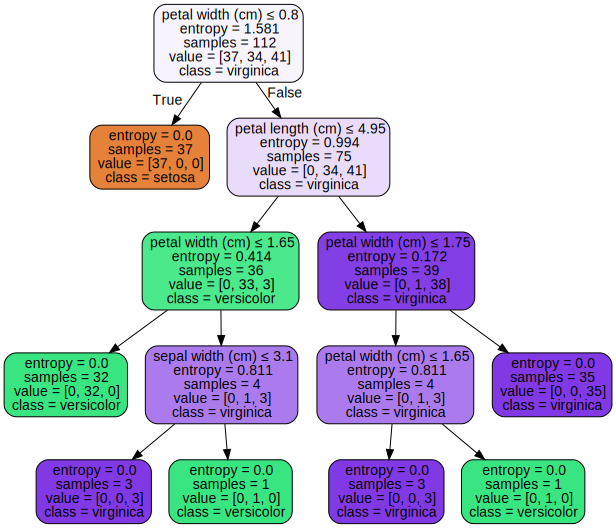

In [6]:
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=iris.feature_names, 
                                class_names=iris.target_names,
                                filled=True, rounded=True,  
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

## 二维决策树决策边界

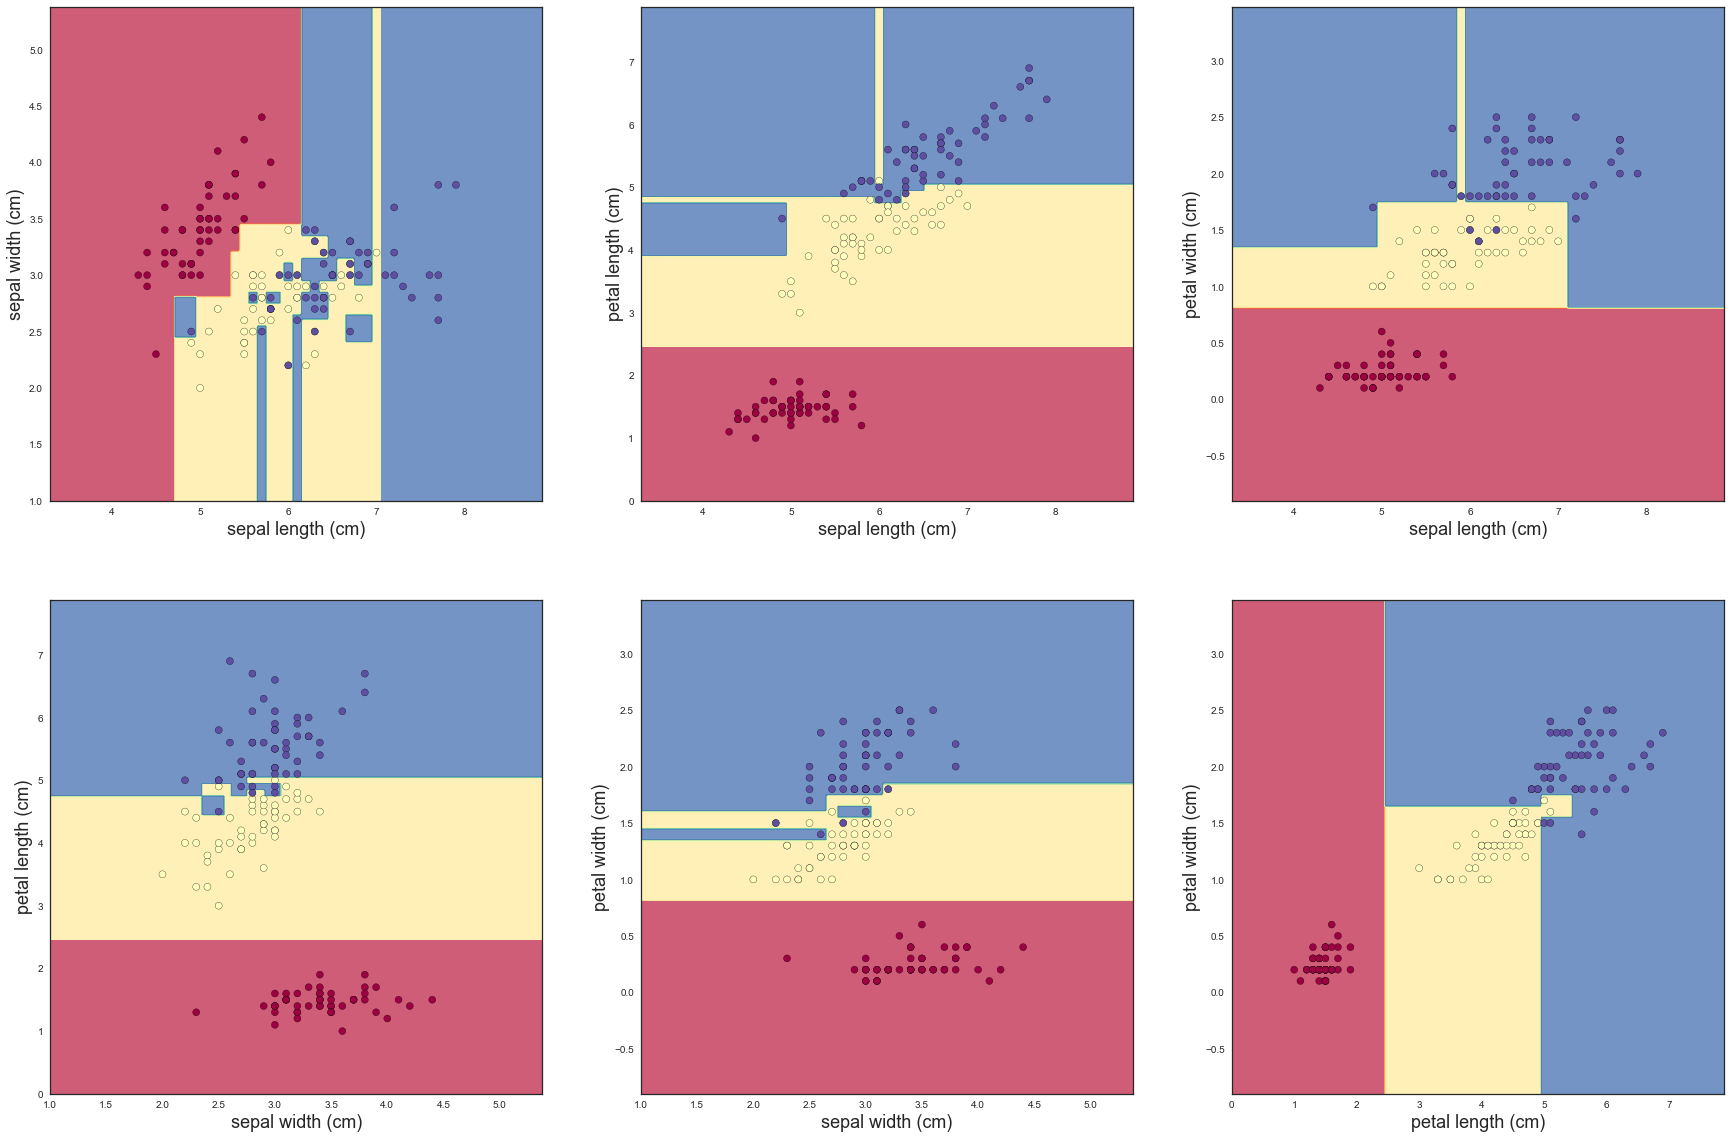

In [7]:
from itertools import combinations

with plt.rc_context(rc={"figure.figsize":(30.0,20.0)}):
    for pairid, pair in enumerate(combinations(np.arange(iris.data.shape[1]), 2)):
        X = iris.data[:, pair]
        y = iris.target

        model = tree.DecisionTreeClassifier()
        model.fit(X, y)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.subplot(2, 3, pairid+1)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.75)
        plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral, edgecolors='black')
        
        plt.xlabel(iris.feature_names[pair[0]], fontsize=18)
        plt.ylabel(iris.feature_names[pair[1]], fontsize=18)